# Тема: Анализ пасажирских авиаперевозок 

# Целевая установка:

По результатам запросов:   
по моделям самолетов и количестве рейсов для каждой модели в сентябре 2018 года;   
по городам и среднем количестве рейсов, прибывающих в город за день в августе 2018 года   
1. выбрать топ-10 городов по количеству рейсов;
2. провести анализ зависимости:   
     - модели самолетов и количество рейсов;
     - города и количество рейсов;
     - топ-10 городов и количество рейсов.
3. Проверить гипотезу о различии среднего спроса на билеты во время проведения различных фестивалей и в обычное время

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сбор-с-сайта-данных-о-11-крупнейших-фестивалях-2018-года" data-toc-modified-id="Сбор-с-сайта-данных-о-11-крупнейших-фестивалях-2018-года-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Сбор с сайта данных о 11 крупнейших фестивалях 2018 года</a></span><ul class="toc-item"><li><span><a href="#Изучение-базы-данных-и-анализ-спроса-на-рейсы" data-toc-modified-id="зучение-базы-данных-и-анализ-спроса-на-рейсы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение базы данных и анализ спроса на рейсы</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-в-датасетах" data-toc-modified-id="Изучение-данных-в-датасетах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение данных в датасетах</a></span></li><li><span><a href="#Вывод-по-результатам-изучения-данных" data-toc-modified-id="Вывод-по-результатам-изучения-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод по результатам изучения данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-зависимости-количества-рейсов-от-города-и-модели-самолетов" data-toc-modified-id="Анализ-зависимости-количества-рейсов-от-города-и-модели самолетов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ зависимости количества рейсов от города и модели самолетов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Сбор с сайта данных о 11 крупнейших фестивалях 2018 года

In [1]:
import pandas as pd
import requests  
from bs4 import (
    BeautifulSoup,
)
URL =  'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL)
#print(req.text)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table',attrs={'id': "best_festivals"})
heading_table = [] 
for row in table.find_all('th'): 
        heading_table.append(row.text) 
content=[] 
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])
festivals = pd.DataFrame(content, columns=heading_table) 
festivals = festivals.loc[0:10]
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


## Изучение базы данных и анализ спроса на рейсы

Изучим базу данных и проведем анализ спроса на рейсы в города, где проходят крупнейшие фестивали с использование SQL Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву

SELECT   
    REQUEST_1.week_number AS week_number,   
    REQUEST_1.ticket_amount AS ticket_amount,   
    REQUEST_2.festival_week AS festival_week,   
    REQUEST_2.festival_name AS festival_name   
FROM   
    (SELECT   
        EXTRACT(week FROM flights.arrival_time) AS week_number,   
        COUNT(tickets.ticket_no) AS ticket_amount   
    FROM   
        flights   
        INNER JOIN airports ON airports.airport_code = flights.arrival_airport   
        INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id   
        INNER JOIN tickets  ON tickets.ticket_no = ticket_flights.ticket_no   
    WHERE   
        DATE_TRUNC('day', flights.arrival_time :: date) > '2018-07-22'   
        AND DATE_TRUNC('day', flights.arrival_time :: date) < '2018-10-01'   
        AND airports.city = 'Москва'   
    GROUP BY   
    week_number   
    ) AS REQUEST_1   
    LEFT JOIN (SELECT   
        EXTRACT(week FROM festival_date) AS festival_week,   
        festival_name   
        FROM   
        festivals   
        WHERE   
        DATE_TRUNC('day', festival_date) > '2018-07-23'   
        AND DATE_TRUNC('day', festival_date) < '2018-09-30'   
        AND festival_city = 'Москва'   
              ) AS REQUEST_2 ON REQUEST_2.festival_week = REQUEST_1.week_number

| WEEK_NUMBER | TICKET_AMOUNT | FESTIVAL_WEEK | FESTIVAL_NAME |
|:-----------:|:-------------:|:-------------:|:-------------:|
|33|51378|nan| |
|31|51034|31|Пикник Афиши|
|38|51518|nan| |	
|30|43568|30|Park Live|
|32|51675|nan| |	
|34|51492|nan| |	
|35|51360|nan| |	
|37|51670|nan| |	
|36|51386|36|Видфест|
|39|51623|nan| |	

Таблица получилась небольшой - проверять по ней гипотезу о связи музыкальных фестивалей и спроса на авиабилеты критерием Стьюдента будет некорректно. Можно предположить, что во время фестивалей спрос практически не меняется: достаточно
посмотреть на столбец ticket_amount и сравнить значения.

## Изучение данных

### Изучение данных в датасетах

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_flights_amount = pd.read_csv('/datasets/query_1.csv')
data_flights_amount

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
data_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


**Вывод:**   
**Таблица <span style="color:red">data_flights_amount</span>**
 содержит данные о:
1. модели самолета (<span style="color:blue">столбец model</span>) - тип данных object;
2. количестве рейсов для каждой модели самолетов сделанных в сентябре 2018 года (<span style="color:blue">столбец flights_amount</span>) - тип данных int64


In [5]:
data_average_flights = pd.read_csv('/datasets/query_3.csv') 
data_average_flights.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
data_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
data_average_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [8]:
data_average_flights.sort_values(by = 'average_flights', ascending = False).head()

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581


**Вывод:**   
**Таблица <span style="color:red">data_average_flights</span>**
 содержит данные о:
1. городов в которых размещены аэропорты (<span style="color:blue">столбец city</span>) - тип данных object;
2. среднем количестве рейсов, прибывающих в данный город за день в августе 2018 года (<span style="color:blue">столбец average_flights</span>) - тип данных float64   
   
Тип данных float64 в данном столбце **необходимо заменить на <span style="color:red">int</span>** для удобства работы с данными.

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Супер, обзор данных выполнен отлично!</div> <br>

### Вывод по результатам изучения данных

По результатам изучения данных запросов:   
по моделям самолетов и количестве рейсов для каждой модели в сентябре 2018 года;   
по городам и среднем количестве рейсов, прибывающих в город за день в августе 2018 года   
**<span style="color:red">Необходимо:</span>**  
1. **округлить** среднее значение количества рейсов; 
2. изменить тип данных на **int** в столбце **<span style="color:blue">average_flights</span>** таблицы **<span style="color:red">data_average_flights</span>**

## Предобработка данных

Измененим тип данных на int в столбце average_flights

Перед изменением типа данных **округлим среднее значение** количества рейсов до целого числа

In [9]:
data_average_flights['average_flights'] = round(data_average_flights[
    'average_flights']).astype('int')

**<span style="color:red">ВЫВОД:</span>**     
Данные готовы к проведению исследования

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
👍</div> <br>

##  Анализ зависимости количества рейсов от города и модели самолетов

Построим график зависимости количество рейсов от города

Text(0.5, 0, 'города, входящие в топ-10')

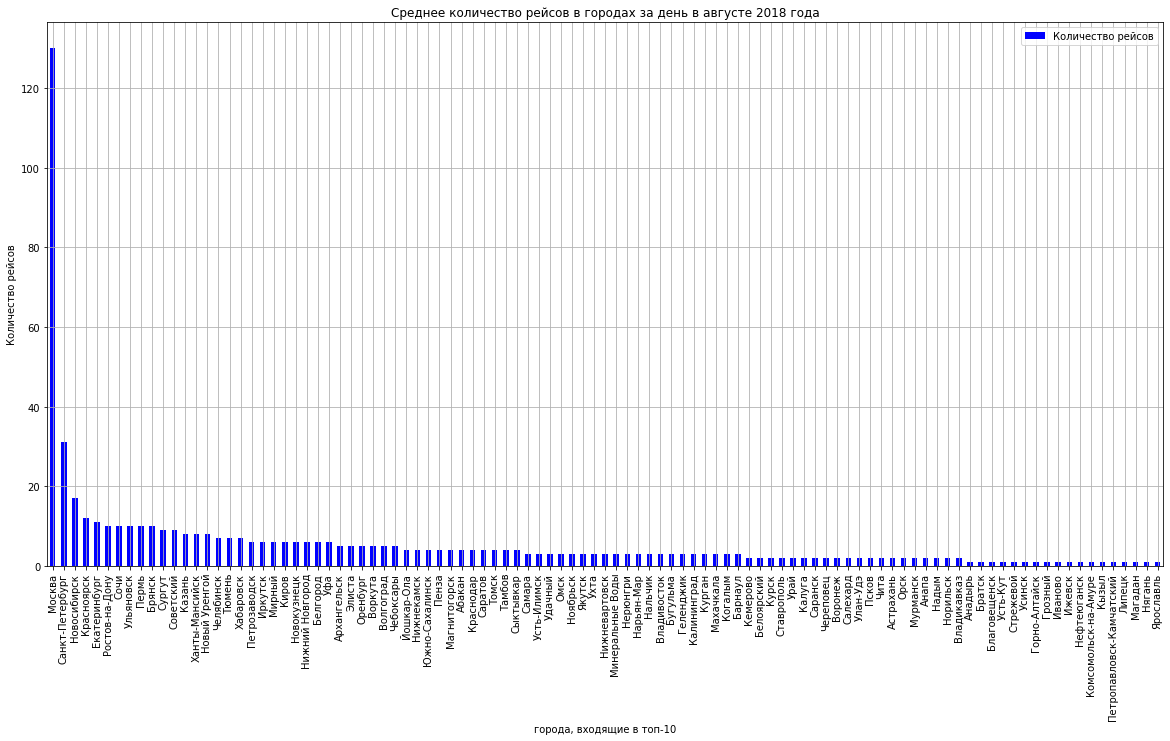

In [10]:
data_average_flights.sort_values(
    by = 'average_flights', 
    ascending = False
).plot(kind = 'bar', 
       x= 'city',
       y='average_flights',
       color='b',
       label='Количество рейсов',
       grid=True,
       figsize=(20, 10))
plt.title('Cреднее количество рейсов в городах за день в августе 2018 года')
plt.ylabel('Количество рейсов')
plt.xlabel('города, входящие в топ-10')

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Супер, на мой взгляд, это самое удачное расположение графика - пусть мы немного потеряли в читаемости подписей, но отсутствует скролл, как было бы при вертикальном расположении!</div> <br>

Определим топ-10 городов по количеству рейсов

In [11]:
print('Топ-10 городов по количеству рейсов:\n', 
      data_average_flights.sort_values(
          by = 'average_flights', 
          ascending = False).head(10))

Топ-10 городов по количеству рейсов:
                city  average_flights
43           Москва              130
70  Санкт-Петербург               31
54      Новосибирск               17
33       Красноярск               12
20     Екатеринбург               11
67   Ростов-на-Дону               10
74             Сочи               10
84        Ульяновск               10
63            Пермь               10
10           Брянск               10


Построим график зависимости количество рейсов в топ-10 городов по максимальному количеству рейсов

Text(0.5, 0, 'города, входящие в топ-10')

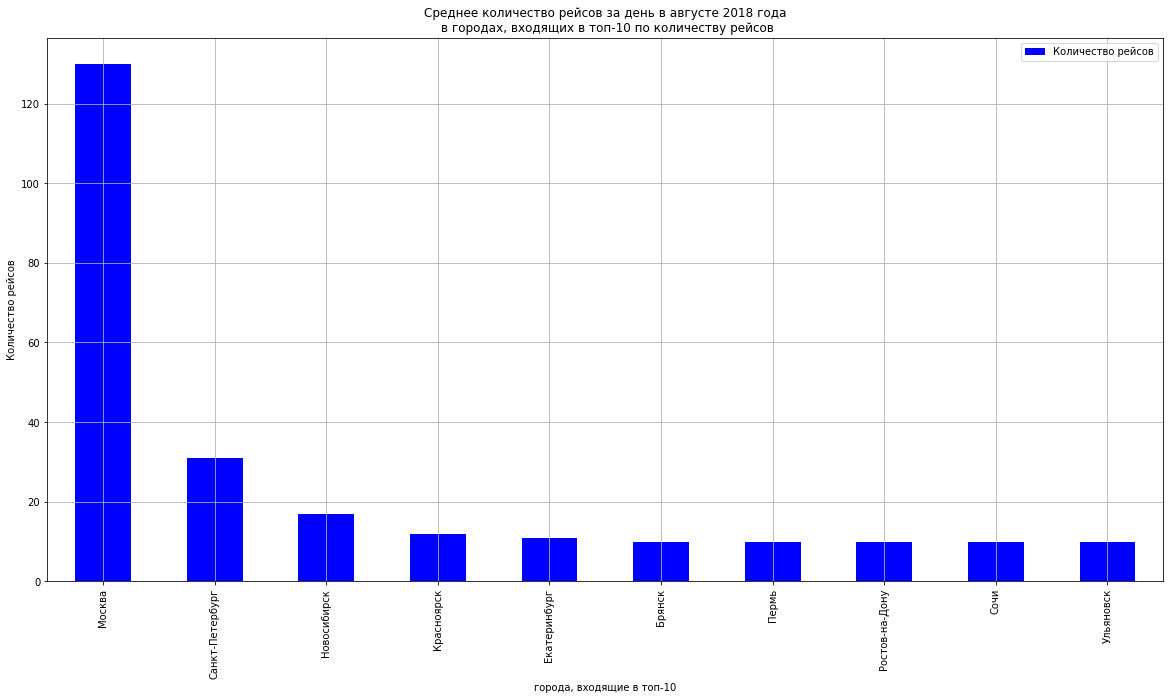

In [12]:
data_average_flights.query('average_flights >= 10').sort_values(
    by = 'average_flights', 
    ascending = False
).plot(kind = 'bar', 
       x= 'city',
       y='average_flights',
       color='b',
       label='Количество рейсов',
       grid=True,
       figsize=(20, 10))
plt.title('Cреднее количество рейсов за день в августе 2018 года\n в городах, входящих в топ-10 по количеству рейсов')
plt.ylabel('Количество рейсов')
plt.xlabel('города, входящие в топ-10')

В Москве максимальное среднее количество рейсов за день и значительно превышает другие города (в три раза).   
**Причина:** большая пропускная способность **<span style="color:red">из-за большего количества</span>** аэропортов (*В Москве - 3, в остальных городах по одному*).   
Для остальных городов количество рейсов **<span style="color:blue">соответствуют классу</span>** аэропортов (их прпускной способности). 

Построим график зависимости количество рейсов от модели самолетов

In [13]:
data_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Text(0.5, 0, 'модель самолета')

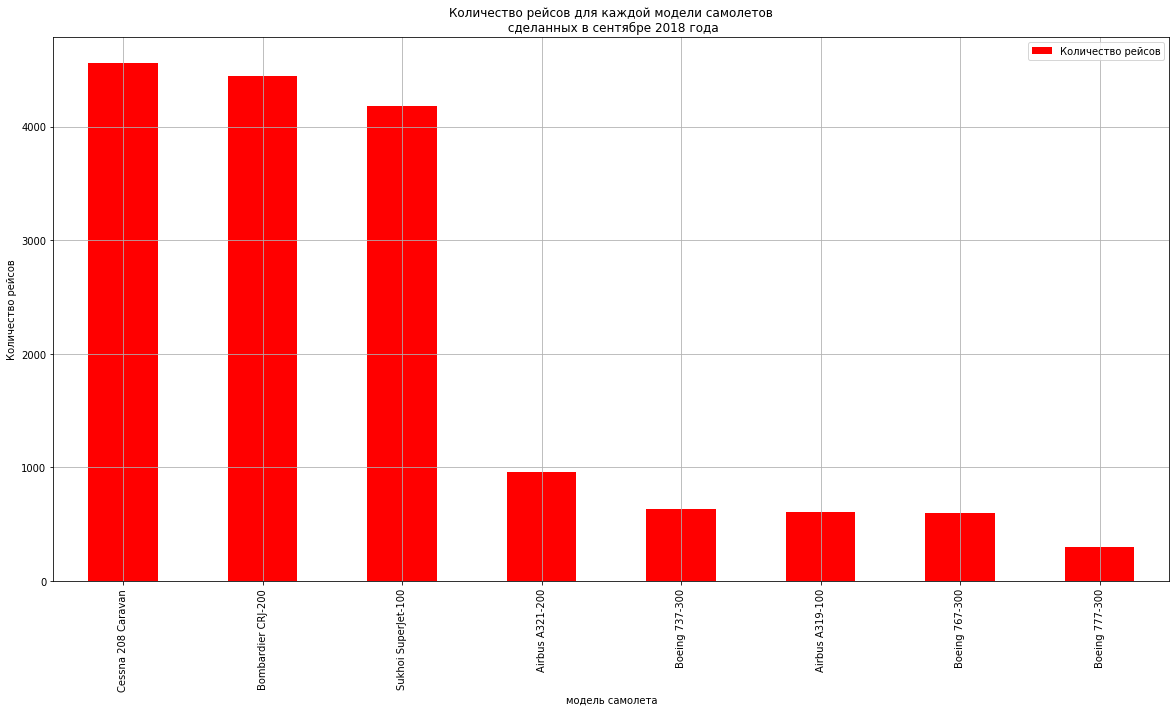

In [14]:
data_flights_amount.sort_values(
    by = 'flights_amount',
    ascending = False
).plot(kind = 'bar', 
       x= 'model',
       y='flights_amount',
       color='r',
       label='Количество рейсов',
       grid=True,
       figsize=(20, 10))
plt.title('Количество рейсов для каждой модели самолетов\n сделанных в сентябре 2018 года')
plt.ylabel('Количество рейсов')
plt.xlabel('модель самолета')

Количество рейсов самолетов Airbus и Boeing на порядок меньше, чем самолетов  других моделей.   
**Причина:**    
модели Airbus и Boeing **<span style="color:red">более вместительны</span> (от 150 до 500 человек)**, являются **средне магистральными** и совершают полеты **<span style="color:blue"> на расстояния 11 000 - 14 000 км</span>**   
Другие модели (Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100) предназанчены для полетов **<span style="color:blue">на расстояния 3 000-4 000 км</span>** и **<span style="color:red">вместимость составляет</span> от 13 до 100 человек**.


## Вывод 


**Топ-10 городов** с наибольшим средним количеством рейсов:
1.  Москва (130 рейсов)
2.  Санкт-Петербург (31 рейс)
3.  Новосибирск (17 рейсов)
4.  Красноярск (12 рейсов)
5.  Екатеринбург (11 рейсов)
6.  Ростов-на-Дону (10 рейсов)
7.  Сочи (10 рейсов)
8.  Ульяновск (10 рейсов)
9.  Пермь (10 рейсов)
10. Брянск (10 рейсов)   

**Количество рейсов зависит** от:
1. от класса аэропрта - **<span style="color:blue">чем выше класс тем больше рейсов</span>**
2. от количества аэропортов в городе - **<span style="color:blue">чем больше аэропортов в гороте тем естественно больше рейсов</span>**
3. от модели самолета - **<span style="color:blue">самолеты предназначенные для перелетов на большие расстояния совершают меньше рейсов</span>** естественно больше времени находятся в полете, нужно больше времени на подготовку к полету. За это время самолеты малой авиации могут совершить несколько рейсов.

Гипотеза о различии среднего спроса на билеты во время проведения различных фестивалей и в обычное время не подтвердилась. Во время фестивалей спрос практически не меняется - достаточно посмотреть на столбец ticket_amount объединенной таблицы и сравнить значения.